# Programming Tasks for Nojoto

## Recommendation Engine

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('data/RecommendationEngineData.xlsx', sheet_name = 'Recommendation EnginDataSet')

In [3]:
data.head(5)

,POST_ID,POST_STRING_UNIQUE_ID,CREATED_AT,Creator_Name,Caption,Length,Watch_Views,Total_Watch_time,Average_Watch_time,10_Sec_Watch_Time,...,Execution_Reach,Spammy_Views,Love,Comment,Share,Report_Abuse,Repost_Count,Creation_type,ContentType,LANGUAGE_NAME
0,5251588,ec7e9ef3246874618d617623ee07451c,2020-04-22 19:51:00,Nojoto News,Know who loved your story | Tag Nojotians #Noj...,51,61196,732610,12.0,584192,...,1000000,28445,1720,108,35,0,73,Uploaded,Video,English
1,5539448,e38e34aa65c0c7c2ed42426fe92e6419,2020-05-10 18:00:00,Nojoto News,Details for Day 1 (Monday) :- \nExpress Karo N...,168,2751,33002,12.0,25716,...,50000,1037,130,10,4,0,17,Uploaded,Video,English
2,5503440,01e4dc698aba6a4561739c58906838cc,2020-05-08 07:33:00,Anand Mohan Jha,Anshh only 4 youðŸ˜‚ sorry #Nojoto #story #Poe...,0,7086,126534,17.9,110171,...,50000,2606,337,113,9,0,21,Uploaded,Video,English
3,5538585,87d93e56b144f5ba7557663b2fb6218c,2020-05-10 15:18:00,Anand Mohan Jha,#krishna_flute à¤®à¤¾à¤ à¤¤à¥‹ à¤®à¤¾à¤ à¤¹à...,0,1119,19908,17.8,17109,...,10000,447,114,34,2,0,12,Created,Video,English
4,5540220,4b20839183de924a7bc8e4bcdc9c20a2,2020-05-10 17:11:00,Bhawna Mishra,#SuperMom #chitthi #letter #originalmess #message,116,1075,15966,14.9,13091,...,10000,376,143,49,1,0,13,Created,Video,English


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
POST_ID                  1000 non-null int64
POST_STRING_UNIQUE_ID    1000 non-null object
CREATED_AT               1000 non-null datetime64[ns]
Creator_Name             1000 non-null object
Caption                  996 non-null object
Length                   1000 non-null int64
Watch_Views              1000 non-null int64
Total_Watch_time         1000 non-null int64
Average_Watch_time       1000 non-null float64
10_Sec_Watch_Time        1000 non-null int64
10_Sec_Views             1000 non-null int64
Execution_Reach          1000 non-null int64
Spammy_Views             1000 non-null int64
Love                     1000 non-null int64
Comment                  1000 non-null int64
Share                    1000 non-null int64
Report_Abuse             1000 non-null int64
Repost_Count             1000 non-null int64
Creation_type            1000 non-null object
ContentType              

### What should be the Top 10 Content pieces for a new user & Why? 

In [5]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

#### Scaling all the metrics

The `MinMaxScaler` will scale the metrics in the range of 0 - 1. We can then add and subtract the metrics to obtain a score.

In [6]:
data['scaled_Watch_Views'] = scaler.fit_transform(data[['Watch_Views']])
data['scaled_Average_Watch_time'] = scaler.fit_transform(data[['Average_Watch_time']])
data['scaled_10_Sec_Views'] = scaler.fit_transform(data[['10_Sec_Views']])
data['scaled_Execution_Reach'] = scaler.fit_transform(data[['Execution_Reach']])
data['scaled_Spammy_Views'] = scaler.fit_transform(data[['Spammy_Views']])
data['scaled_Love'] = scaler.fit_transform(data[['Love']])
data['scaled_Comment'] = scaler.fit_transform(data[['Comment']])
data['scaled_Share'] = scaler.fit_transform(data[['Share']])
data['scaled_Repost_Count'] = scaler.fit_transform(data[['Repost_Count']])
data['scaled_Report_Abuse'] = scaler.fit_transform(data[['Report_Abuse']])

In [7]:
data['score'] = data['scaled_Watch_Views'] + data['scaled_Average_Watch_time'] + data['scaled_10_Sec_Views'] +\
data['scaled_Execution_Reach'] - data['scaled_Spammy_Views'] + data['scaled_Love'] + data['scaled_Comment'] +\
data['scaled_Share'] + data['scaled_Repost_Count'] - data['scaled_Report_Abuse']

Getting the top 10 scores and then sorting them by receny.

In [8]:
top_30 = data.sort_values('score', ascending = False).head(30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

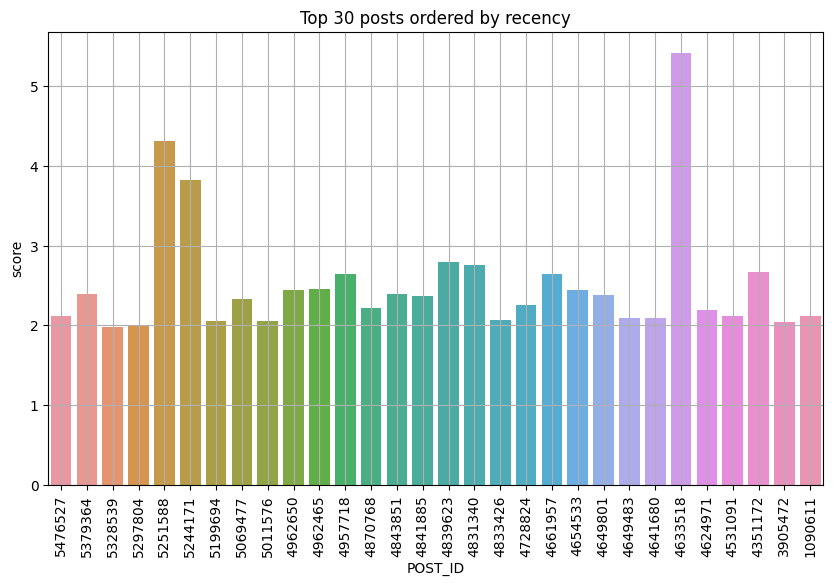

In [9]:
plt.figure(figsize=(10, 6), dpi = 100)
sns.barplot(x = 'POST_ID', y = 'score', data = top_30,
           order = top_30.sort_values(by = 'CREATED_AT', ascending = False)['POST_ID'])
plt.grid()
plt.title("Top 30 posts ordered by recency")
plt.xticks(rotation=90)

Taking a look at top 10 post IDs by receny. Since these posts are the most recent ones and have the highest scores, we can present them to a new user.

In [10]:
top_10 = data[data.POST_ID.isin(top_30.sort_values(by = 'CREATED_AT', ascending = False).head(10)['POST_ID']\
                                .to_list())]

In [11]:
top_10.reset_index(drop = True, inplace = True)
top_10.iloc[:,0:18]

,POST_ID,POST_STRING_UNIQUE_ID,CREATED_AT,Creator_Name,Caption,Length,Watch_Views,Total_Watch_time,Average_Watch_time,10_Sec_Watch_Time,10_Sec_Views,Execution_Reach,Spammy_Views,Love,Comment,Share,Report_Abuse,Repost_Count
0,5251588,ec7e9ef3246874618d617623ee07451c,2020-04-22 19:51:00,Nojoto News,Know who loved your story | Tag Nojotians #Noj...,51,61196,732610,12.0,584192,21149,1000000,28445,1720,108,35,0,73
1,5476527,be65e3d72d5e21b5d2b324adf5d08730,2020-05-06 11:15:00,à¤•à¤µà¤¿ à¤°à¤¾à¤¹à¥à¤² à¤ªà¤¾à¤²,Old Man - Lost Smile\n#StoryOnline \n#nojotofi...,187,1901,40310,21.2,35967,776,10000,668,336,209,8,0,51
2,5379364,6e44130461633f7b43456469c6355703,2020-04-30 14:00:00,Nojoto News,à¤…à¤­à¥€ à¤¤à¥‹ à¤¬à¤¸ à¤œà¤¼à¤¿à¤¨à¥à¤¦à¤—à...,67,10808,138849,12.8,111024,3418,50000,3444,716,115,107,0,42
3,5199694,0c49aa0598481823a3d81fff5adfaba2,2020-04-19 20:07:00,Sourabh shresth,https://instagram.com/sourabh_shresth?igshid=1...,0,12512,267545,21.4,239129,5140,50000,3696,950,123,16,0,17
4,5244171,fb6d818f7bf2bd153c69897b8f299ce0,2020-04-22 12:19:00,à¤•à¤µà¤¿ à¤°à¤¾à¤¹à¥à¤² à¤ªà¤¾à¤²,#MessageForModi\ncomedy -only for fun \nà¤¨à¤¿...,236,19197,483765,25.2,436495,8274,50000,4965,1052,283,58,0,65
5,5297804,74a1d289f818f4ee6c48178f5b6a54e7,2020-04-25 15:28:00,à¤•à¤µà¤¿ à¤°à¤¾à¤¹à¥à¤² à¤ªà¤¾à¤²,""" à¤†à¤ˆà¤¨à¥‡ à¤¸à¥‡ à¤¦à¥à¤µà¤‚à¤¦à¥à¤µ""\n...",0,6353,118239,18.6,103216,2465,25000,2045,504,183,6,0,42
6,5328539,875b097e3bc79fd2bcbc60dc8fcaaf24,2020-04-27 13:27:00,Bhawna Mishra,#lovebeat #PoetryOnline #shadi,154,3057,77706,25.4,71139,1400,10000,714,485,128,21,0,33
7,5069477,679715d4c44fed79150d3ff2e7e601a9,2020-04-12 20:00:00,Nojoto News,Details for Day 1 (Monday):-\nExpress Karo Na\...,128,24508,440849,18.0,383910,10203,80000,8419,917,66,25,0,41
8,4962650,066ca277b6748b1f230d954463ca6155,2020-04-06 17:39:00,Nalini,#poetryonline #kinnar #nojotohindi #hindipoetr...,137,16897,244298,14.5,197238,6810,50000,3646,1183,163,35,0,30
9,5011576,092b940d8c01ec06a79efe7dfa1cbd4e,2020-04-09 14:01:00,Swati shikha laxmi,â¤ #nojotovideo #hindipoetry,0,9798,190784,19.5,164774,4033,25000,2159,867,104,40,0,24


### Which are the Recommendation Engine Variables that should be used to improve the current algorithm which can serve the content better

The following metrics are important towards the contribution of a better recommendation engine:
1. Watch_Views
2. Average_Watch_time
3. 10_Sec_Views
4. Execution_Reach
5. Love
6. Comment
7. Share
8. Repost_Count

Whereas the following can be reduced to decrease the importance of a video:
1. Spammy_Views
2. Report_Abuse

The correlation among these variables can also be obtained:

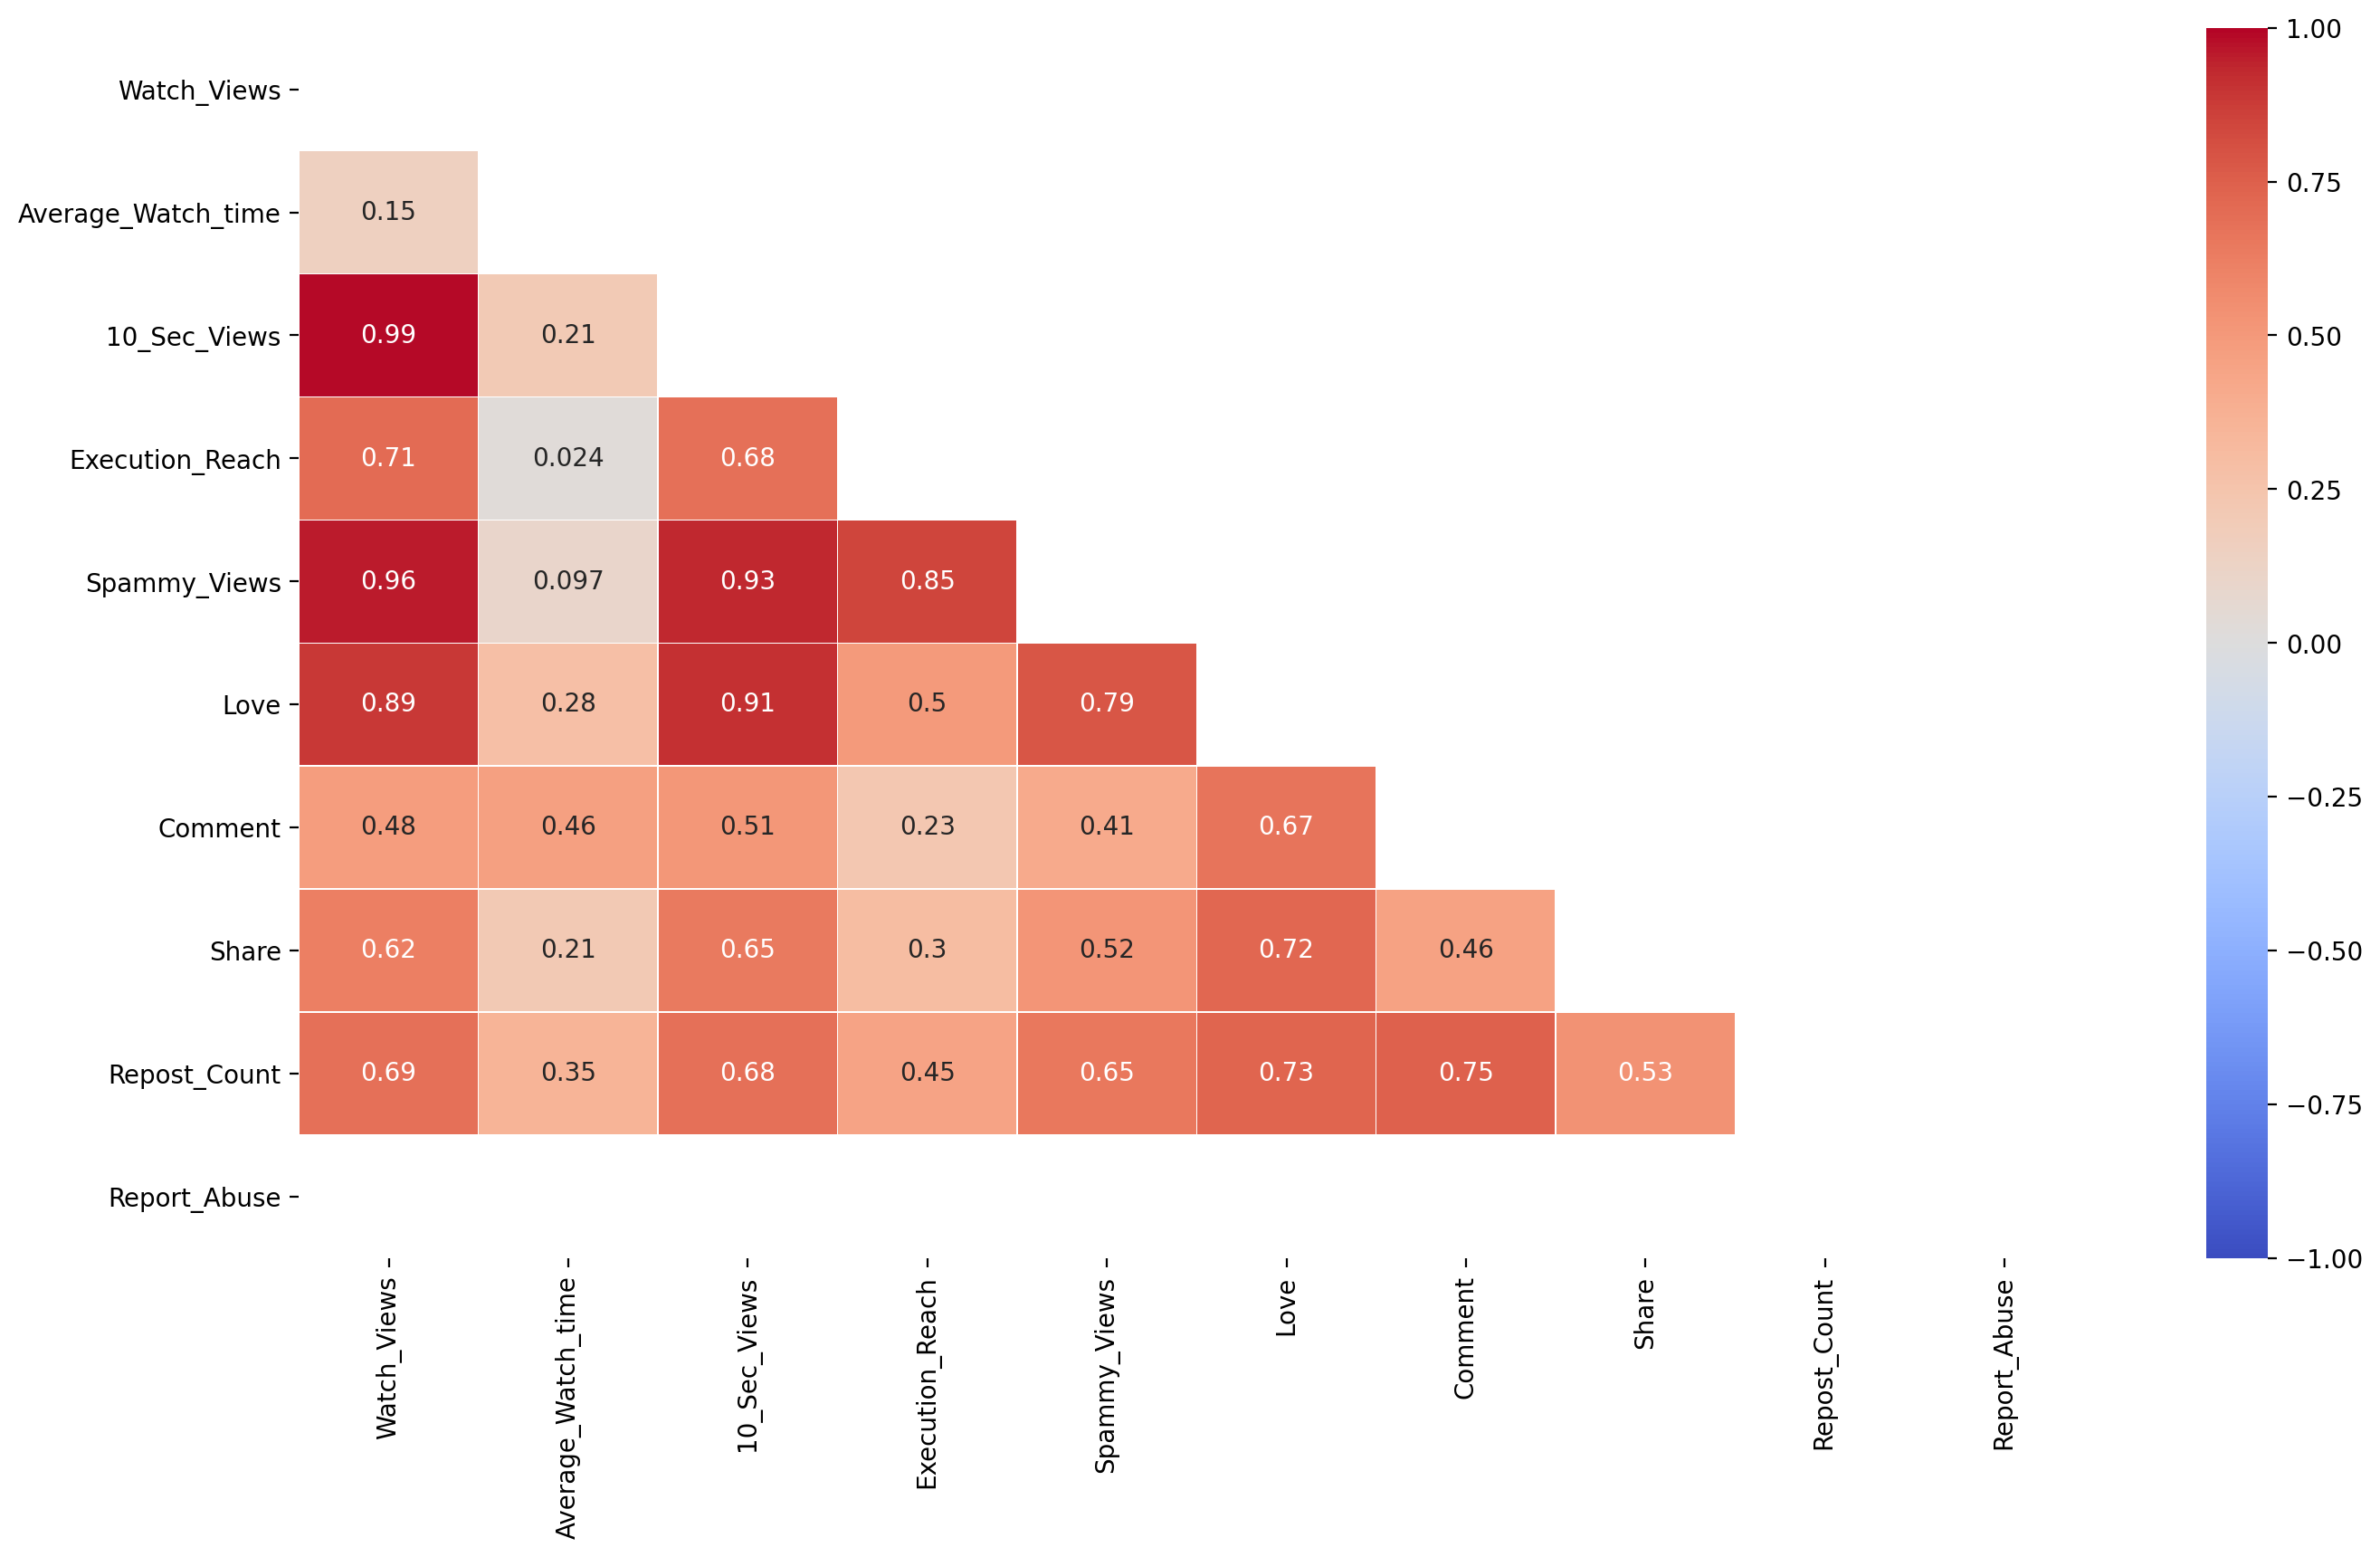

In [12]:
plt.figure(figsize=(16, 9), dpi = 200)

corr_plot = data[['Watch_Views', 'Average_Watch_time', '10_Sec_Views', 
                  'Execution_Reach', 'Spammy_Views', 'Love', 'Comment', 
                  'Share', 'Repost_Count', 'Report_Abuse']].corr()
mask = np.zeros_like(corr_plot, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_plot,
            square=False, 
            linewidth=.1,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask)
plt.show()

As shown in the correlation plot above, a lot of these variables are highly correlation with watch views. Thus stating that they're important as metrics in a recommendation system.

### Is there any other insights that you can pick up, apart from those asked above

1. Watch views seems to be very poorly correlated with watch time and highly correlated with spammy views - suggesting that a lot of videos might be spam.
2. Views with a more 'Love' tend to be 'Shared' and 'Reposted' more often.
3. Metrics such as spammy views and report abuse can be used to detect anomalies and misbehaving users.

## Cohort Analysis

In [13]:
df = pd.read_excel('data/Online_Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
df1 = df.dropna(subset=['CustomerID'])

In [16]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df1['InvoiceMonth'] = df1['InvoiceDate'].apply(get_month)
df1['CohortMonth'] = df1.groupby('CustomerID')['InvoiceMonth'].transform('min')

/Users/jacob1.ext/Codes/covid-19/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jacob1.ext/Codes/covid-19/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
invoice_year, invoice_month, _ = get_date(df1, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date(df1, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
df1['CohortIndex'] = year_diff * 12 + month_diff + 1

/Users/jacob1.ext/Codes/covid-19/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Create 1st Cohort: User number & Retention Rate

In [18]:
cohort_data = df1.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# as percentages

cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


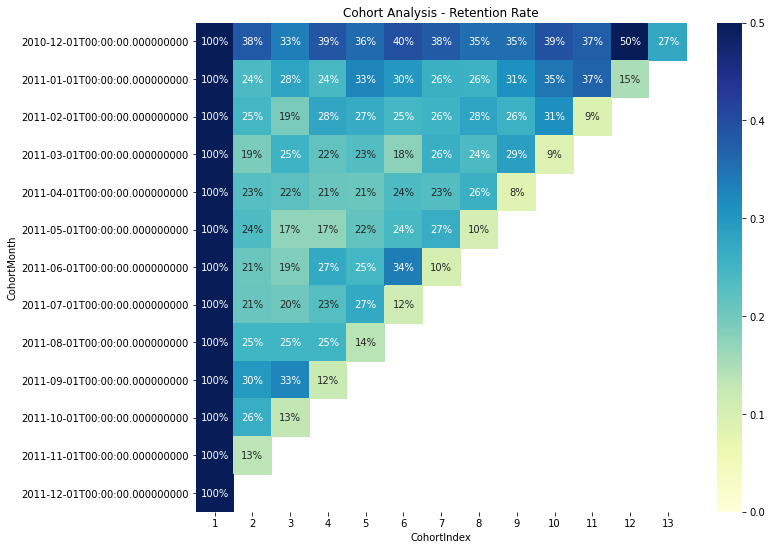

In [20]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()

### Create the 2nd Cohort: Average Quantity Sold


In [21]:
cohort_data2 = df1.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
average_quantity  = cohort_data2.pivot_table(index = 'CohortMonth',
                                            columns = 'CohortIndex',
                                       values = 'Quantity').round(1)
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


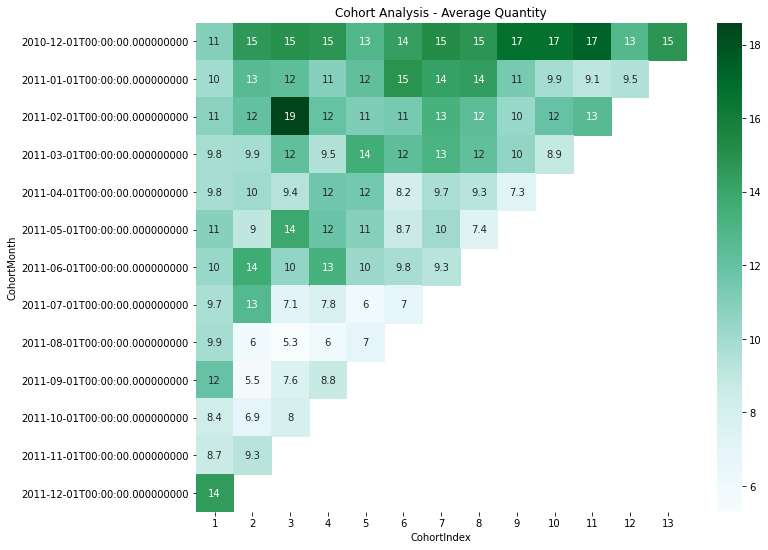

In [22]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, 
            annot = True, 
            cmap = "BuGn")
plt.show()

### Create the 3rd Cohort: Average Sales

In [23]:
df1['TotalSale'] = df1['Quantity'] * df1['UnitPrice']
cohort_data3 = df1.groupby(['CohortMonth', 'CohortIndex'])['TotalSale'].mean().reset_index()
average_sales  = cohort_data3.pivot_table(index = 'CohortMonth',
                                           columns = 'CohortIndex',
                                      values = 'TotalSale').round(1)
average_sales

/Users/jacob1.ext/Codes/covid-19/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,20.7,25.0,25.1,25.0,19.9,25.5,26.5,25.4,26.0,31.1,30.6,22.2,24.7
2011-01-01,18.4,23.5,20.3,17.5,21.5,25.4,24.4,24.5,18.7,20.1,18.7,18.4,NaN
2011-02-01,17.0,17.0,19.3,18.8,16.1,15.1,21.6,20.9,17.5,20.6,21.5,NaN,NaN
2011-03-01,17.0,17.9,21.5,17.0,19.2,18.1,21.7,17.3,15.4,11.4,NaN,NaN,NaN
2011-04-01,16.4,20.2,18.8,18.4,18.6,14.2,14.6,15.3,11.8,NaN,NaN,NaN,NaN
2011-05-01,19.0,15.7,21.2,19.4,17.8,14.1,16.1,13.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,16.4,14.5,19.0,19.8,15.0,15.9,12.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,13.1,21.2,11.4,12.4,10.5,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.1,11.9,11.5,14.4,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


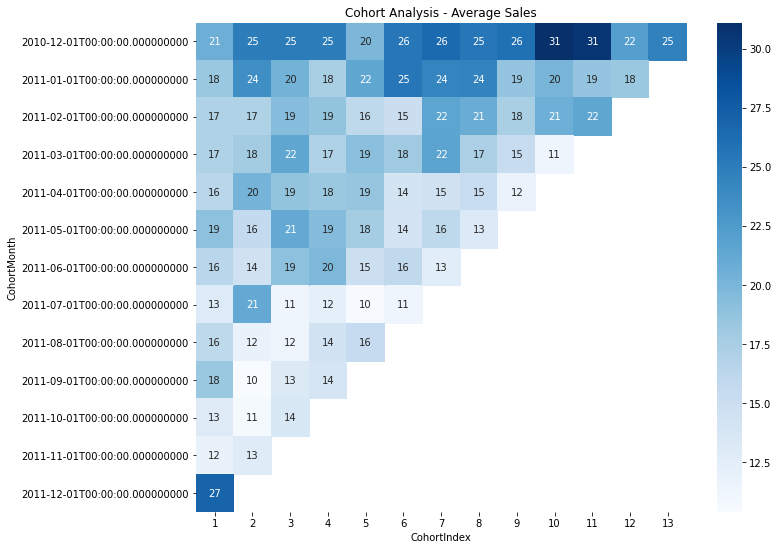

In [24]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = average_sales, 
            annot = True, 
            cmap = "Blues")
plt.show()